<a href="https://colab.research.google.com/github/soumyasanu/machine-learning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
#loading data
car_dataset = pd.read_csv('car data.csv')

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_dataset.shape

(301, 9)

In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking distribution of catgorcial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#encoding the categorical dtaa

#enccoding fuel type data

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#spitting data into training data and test data
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']



In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [19]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spitting and test data

In [20]:
X_train,X_test ,Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state=2)

In [21]:
print(X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

Model Training

1.Linear Regression

In [22]:
#loading thr linear regrrssionn model

linear_regression_model = LinearRegression()

In [23]:
linear_regression_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [25]:
#prediction on trainging data
training_data_prediction = linear_regression_model.predict(X_train)

In [29]:
# R square error fot comparing of prediction data and Y_train
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [31]:
print("R squared error",error_score)

R squared error 0.8799451660493711


Visualise the actual prices and predicted prices

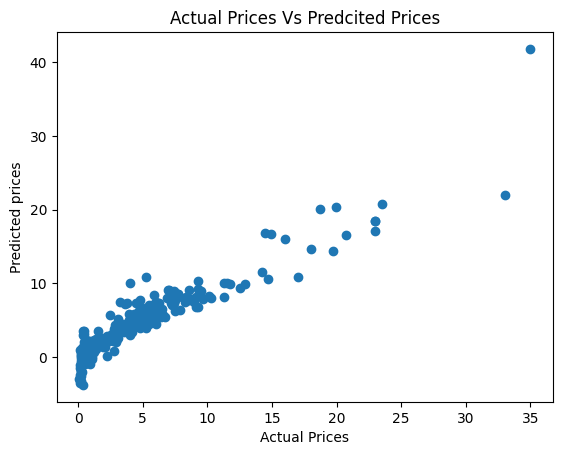

In [33]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices Vs Predcited Prices")
plt.show()

In [34]:
test_data_prediction = linear_regression_model.predict(X_test)

In [38]:
error_score1 = metrics.r2_score(Y_test,test_data_prediction)

In [39]:
print(error_score1)

0.8365766715027051


In [ ]:
2

2.Lasso Regressiom


In [41]:
#loading thr lasso regrrssionn model

lasso_regression_model = Lasso()

In [42]:
lasso_regression_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [43]:
#prediction on trainging data
training_data_prediction = lasso_regression_model.predict(X_train)

In [44]:
# R square error fot comparing of prediction data and Y_train
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [45]:
print("R squared error",error_score)

R squared error 0.8427856123435794


Visualise the actual prices and predicted prices

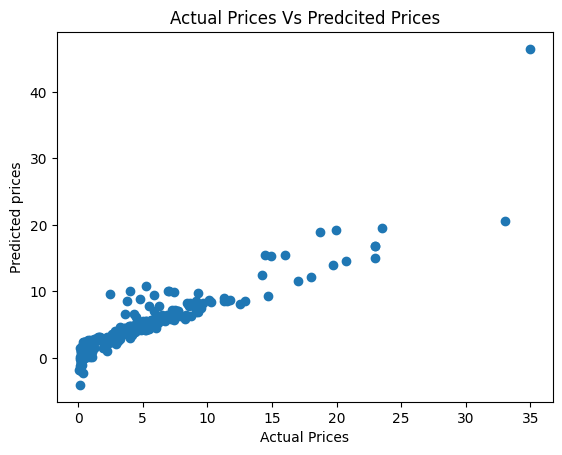

In [46]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices Vs Predcited Prices")
plt.show()

In [47]:
test_data_prediction = lasso_regression_model.predict(X_test)

In [48]:
error_score1 = metrics.r2_score(Y_test,test_data_prediction)

In [49]:
print(error_score1)

0.8709167941173195


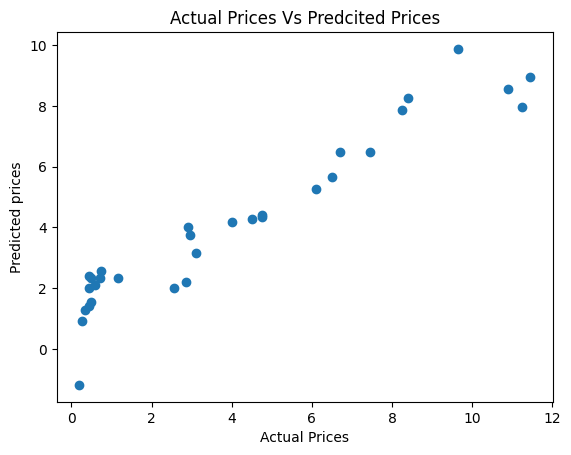

In [50]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices Vs Predcited Prices")
plt.show()

2.Lasso Regressiom
